##1.INTRODUCTION AND EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Important imports
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.applications.inception_v3 import preprocess_input 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from PIL import Image
from tensorflow.keras.models import Model 
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

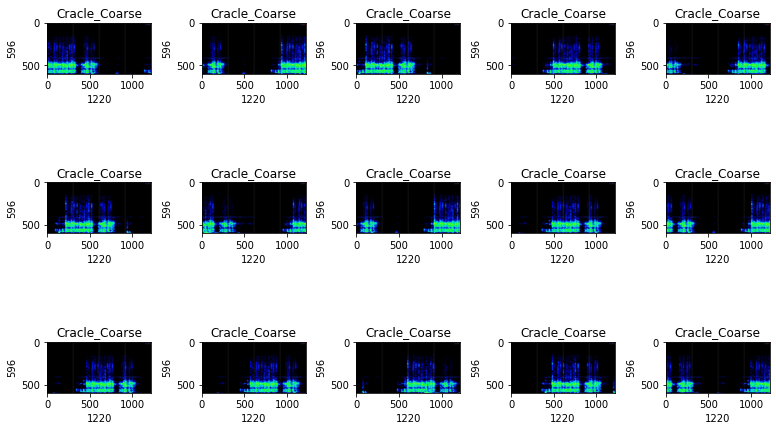

In [3]:
# Plotting random 15 images to check dataset
plt.figure(figsize=(11,11))
path = "./drive/MyDrive/spectrogram/archive/train/(Generated) Crackle_Coarse"
for i in range(1,16):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('Cracle_Coarse')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
image = Image.open("./drive/MyDrive/spectrogram/archive/train/(Generated) Crackle_Coarse/Crackle_Coarse_0001.jpg")


width, height = image.size


print(width, height)

1220 596


In [ ]:
# Setting root directory path and creating empty list
dir = "./drive/MyDrive/spectrogram/archive/train"
root_dir = listdir(dir)


In [ ]:
''' Creating Dataset '''


def dataset(dir_name, abnormality_name):
    for i in tqdm(os.listdir(dir_name)):
        ''' joining two paths '''
        p = os.path.join(dir_name, i)
        try:
            ''' reading image '''
            img = cv2.imread(p)
            ''' resizing an image '''
            img = cv2.resize(img,(150,150))
        except:
            continue
        ''' appending images to X and labels to y'''
        image_list.append(img)
        label_list.append(abnormality_name)
    return image_list,label_list

In [ ]:
''' name of directorires '''
os.listdir("./drive/MyDrive/spectrogram/archive/train")

['(Real) Non-Covid',
 '(Generated) normal',
 '(Generated) Wheezes',
 '(Real) Covid',
 '(Generated) Crackle_Coarse',
 '(Generated) Crackle_Fine']

In [ ]:
''' path of following class '''
Non_Covid = "./drive/MyDrive/spectrogram/archive/train/(Real) Non-Covid"
Normal = "./drive/MyDrive/spectrogram/archive/train/(Generated) normal"
Wheezes = "./drive/MyDrive/spectrogram/archive/train/(Generated) Wheezes"
Covid_Positive = "./drive/MyDrive/spectrogram/archive/train/(Real) Covid"
Crackle_Coarse = "./drive/MyDrive/spectrogram/archive/train/(Generated) Crackle_Coarse"
Crackle_Fine = "./drive/MyDrive/spectrogram/archive/train/(Generated) Crackle_Fine"

In [ ]:
''' Calling dataset function to create data for each class '''
image_list, label_list = [], []
image_list, label_list = dataset(Non_Covid,"Non_Covid")
image_list, label_list= dataset(Normal,"Normal")
image_list, label_list=dataset(Wheezes,"Wheezes")
image_list, label_list=dataset(Covid_Positive,"Covid_Positive")
image_list, label_list=dataset(Crackle_Coarse,"Crackle_Coarse")
image_list, label_list=dataset(Crackle_Fine,"Crackle_Fine")



100%|██████████| 365/365 [03:09<00:00,  1.92it/s]


In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

Non_Covid         2680
Covid_Positive    1724
Normal            1133
Crackle_Coarse     410
Crackle_Fine       365
Wheezes            312
dtype: int64

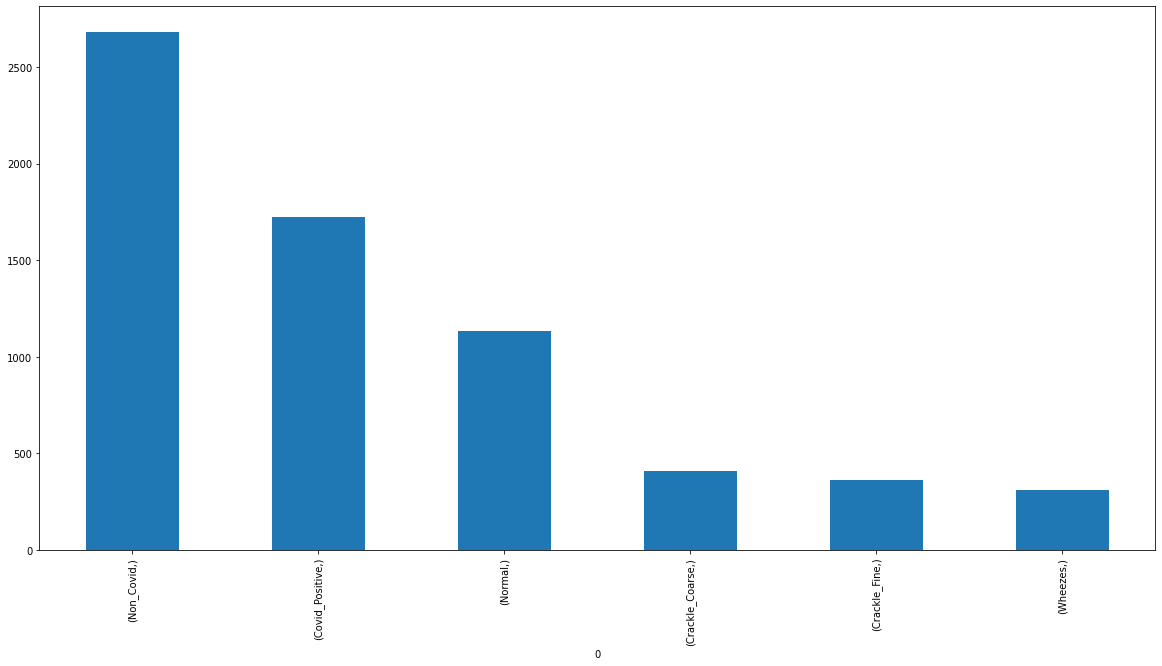

In [ ]:
# How many images are there of each of the abnormality
label_counts.plot.bar(figsize=(20, 10));

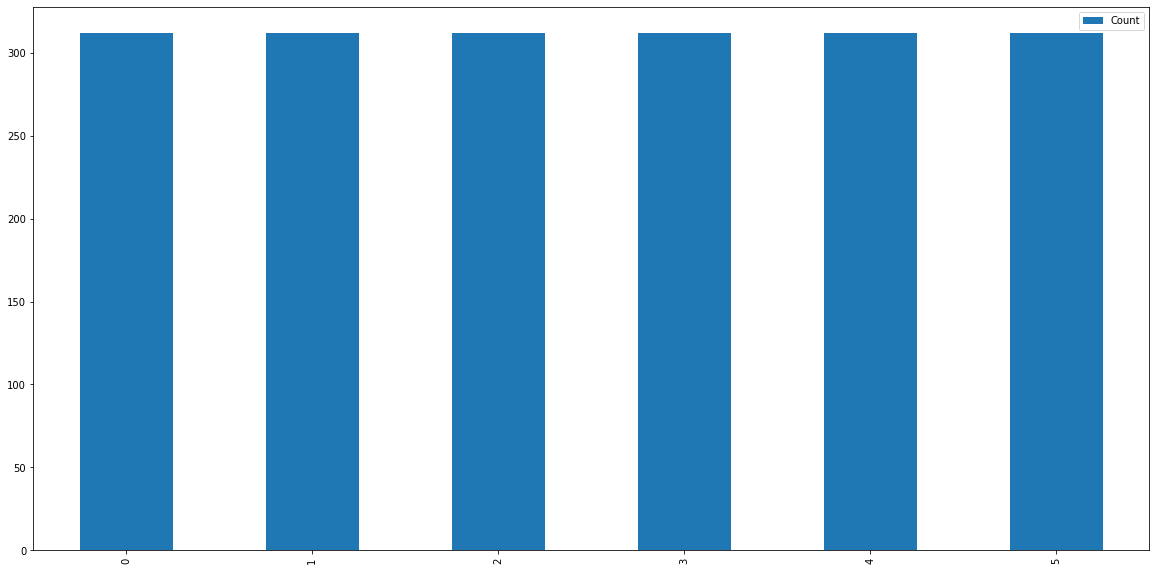

In [10]:
# How many images are there of each of the abnormality
df.plot.bar(figsize=(20, 10));

In [ ]:
label_counts.median()

771.5

In [ ]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

In [ ]:
# Checking x data shape
np.array(image_list).shape

(6624, 150, 150, 3)

In [ ]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(6624,)

In [ ]:
# Splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.3, random_state = 10) 

In [ ]:
# Normalize and reshape data
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
x_train = X_train.reshape( -1, 150,150,3)
X_test = X_test.reshape( -1, 150,150,3)

In [ ]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['Covid_Positive' 'Crackle_Coarse' 'Crackle_Fine' 'Non_Covid' 'Normal'
 'Wheezes']


In [ ]:
# Splitting the training data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [ ]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

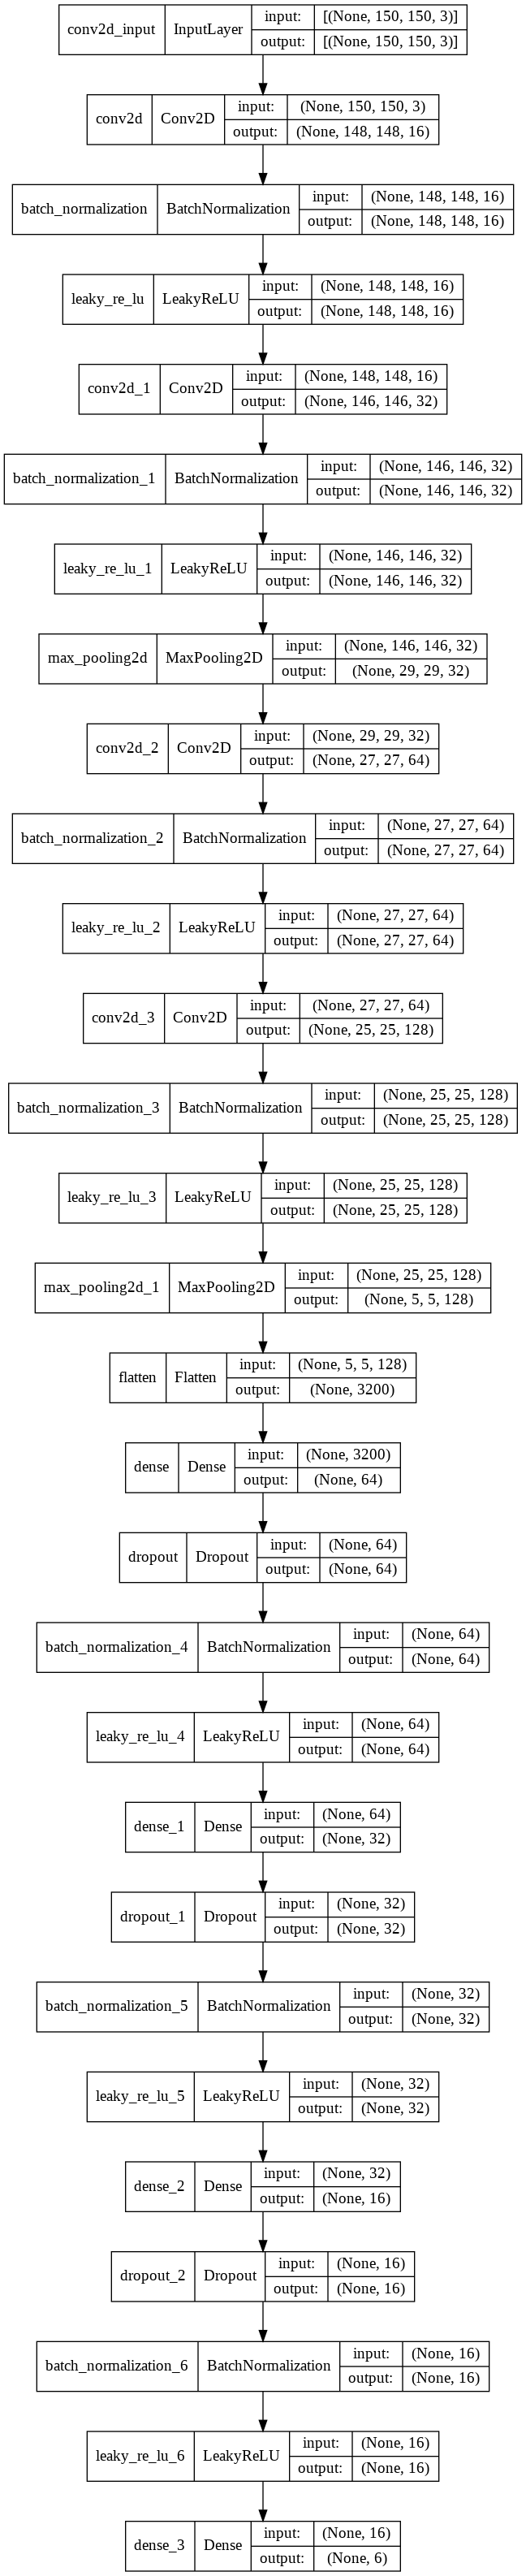

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training the model
epochs = 25
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)
batch_size = 32
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,verbose=1,callbacks=es, validation_data = (X_val, y_val))

Epoch 1/25
102/102 [==============================] - 20s 97ms/step - loss: 1.1938 - accuracy: 0.5504 - val_loss: 1.6277 - val_accuracy: 0.2789
Epoch 2/25
102/102 [==============================] - 8s 80ms/step - loss: 0.6387 - accuracy: 0.8271 - val_loss: 1.5351 - val_accuracy: 0.2078
Epoch 3/25
102/102 [==============================] - 8s 80ms/step - loss: 0.4671 - accuracy: 0.8564 - val_loss: 0.9806 - val_accuracy: 0.7520
Epoch 4/25
102/102 [==============================] - 8s 81ms/step - loss: 0.3835 - accuracy: 0.8616 - val_loss: 0.5601 - val_accuracy: 0.8102
Epoch 5/25
102/102 [==============================] - 8s 80ms/step - loss: 0.3381 - accuracy: 0.8678 - val_loss: 0.3649 - val_accuracy: 0.8555
Epoch 6/25
102/102 [==============================] - 8s 81ms/step - loss: 0.3009 - accuracy: 0.8700 - val_loss: 0.2625 - val_accuracy: 0.8728
Epoch 7/25
102/102 [==============================] - 8s 81ms/step - loss: 0.2866 - accuracy: 0.8653 - val_loss: 0.2447 - val_accuracy: 0.872

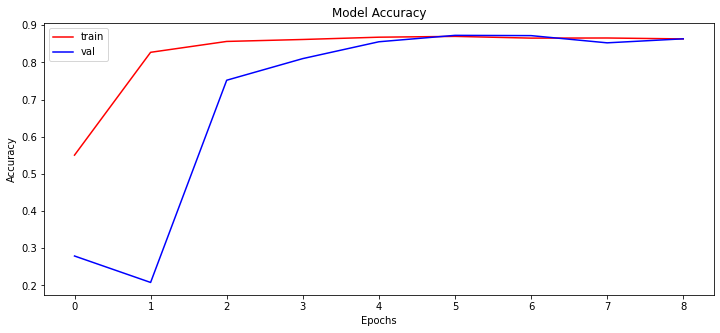

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

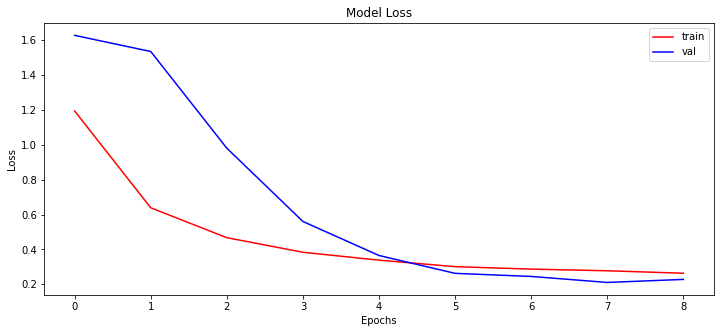

In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Calculating test accuracy 
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

63/63 [==============================] - 2s 30ms/step - loss: 0.2321 - accuracy: 0.8672
Test Accuracy: 86.72032356262207


In [ ]:
# Storing model predictions
y_pred = model.predict(X_test)

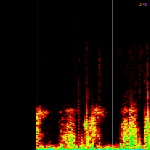

In [ ]:
# Plotting image to compare
img = array_to_img(X_test[22])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[25])])
print("Predicted : ",labels[np.argmax(y_pred[25])])

['Covid_Positive' 'Crackle_Coarse' 'Crackle_Fine' 'Non_Covid' 'Normal'
 'Wheezes']
Originally :  Wheezes
Predicted :  Wheezes


In [ ]:
model.save('./drive/MyDrive/spectrogram/custom_cnn.h5')